In [1]:
import os
import warnings
import time

# pandas 관련 모듈
import numpy as np
import pandas as pd

In [2]:
# 분석에 문제 없는 경고 메세지 숨기기
warnings.filterwarnings("ignore")

# 접근 기본 디렉토리 변경 (사람마다 다름)
os.chdir('D:/Jupyter/cap1')

In [3]:
data1 = pd.read_csv('./final_using_data.csv', encoding = 'utf-8')

In [4]:
data1

,datetime,gu,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,dust,people,people_perc,congestion
0,2017-01-01 00:00:00,종로구,11110,1,2,6,0,2.0,0.4,0.0,80.4,54.0,283391,0.045996,4
1,2017-01-01 00:00:00,중구,11140,1,2,6,0,2.0,0.4,0.0,80.4,54.0,189272,0.041112,2
2,2017-01-01 00:00:00,용산구,11170,1,2,6,0,2.0,0.4,0.0,80.4,54.0,288680,0.041923,2
3,2017-01-01 00:00:00,성동구,11200,1,2,6,0,2.0,0.4,0.0,80.4,54.0,313852,0.041361,2
4,2017-01-01 00:00:00,광진구,11215,1,2,6,0,2.0,0.4,0.0,80.4,54.0,382976,0.041346,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314595,2022-12-31 23:00:00,관악구,11620,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,468533,0.042621,3
1314596,2022-12-31 23:00:00,서초구,11650,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,464794,0.039558,1
1314597,2022-12-31 23:00:00,강남구,11680,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,626217,0.037761,0
1314598,2022-12-31 23:00:00,송파구,11710,12,2,5,23,-1.0,1.0,0.0,60.9,70.0,726058,0.041104,2


In [5]:
data = data1[data1['datetime']>='2022-01-01']

In [6]:
data['rain'] = data['rain'].astype('int64')
data['dust'] = data['dust'].astype('int64')

In [7]:
max(data['people'])

1174872

In [8]:
min(data['people'])

132532

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219000 entries, 1095600 to 1314599
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     219000 non-null  object 
 1   gu           219000 non-null  object 
 2   gu_code      219000 non-null  int64  
 3   month        219000 non-null  int64  
 4   holiday      219000 non-null  int64  
 5   day          219000 non-null  int64  
 6   hour         219000 non-null  int64  
 7   temp         219000 non-null  float64
 8   wind         219000 non-null  float64
 9   rain         219000 non-null  int64  
 10  humidity     219000 non-null  float64
 11  dust         219000 non-null  int64  
 12  people       219000 non-null  int64  
 13  people_perc  219000 non-null  float64
 14  congestion   219000 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 26.7+ MB


In [10]:
data = data.drop(['gu', 'people_perc', 'congestion', 'dust'], axis = 1)

In [11]:
max_people = data['people'].max()
min_people = data['people'].min()

# 'people' 열의 값을 0과 1 사이의 값으로 정규화
data['people_normalized'] = (data['people'] - min_people) / (max_people - min_people)
data

,datetime,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,people,people_normalized
1095600,2022-01-01 00:00:00,11110,1,2,5,0,-9.9,1.0,0,33.2,198013,0.062821
1095601,2022-01-01 00:00:00,11140,1,2,5,0,-9.9,1.0,0,33.2,163439,0.029652
1095602,2022-01-01 00:00:00,11170,1,2,5,0,-9.9,1.0,0,33.2,252165,0.114773
1095603,2022-01-01 00:00:00,11200,1,2,5,0,-9.9,1.0,0,33.2,312343,0.172507
1095604,2022-01-01 00:00:00,11215,1,2,5,0,-9.9,1.0,0,33.2,348524,0.207218
...,...,...,...,...,...,...,...,...,...,...,...,...
1314595,2022-12-31 23:00:00,11620,12,2,5,23,-1.0,1.0,0,60.9,468533,0.322353
1314596,2022-12-31 23:00:00,11650,12,2,5,23,-1.0,1.0,0,60.9,464794,0.318765
1314597,2022-12-31 23:00:00,11680,12,2,5,23,-1.0,1.0,0,60.9,626217,0.473631
1314598,2022-12-31 23:00:00,11710,12,2,5,23,-1.0,1.0,0,60.9,726058,0.569417


In [12]:
temp_df = data.drop(['people_normalized'], axis = 1)
temp_df

,datetime,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,people
1095600,2022-01-01 00:00:00,11110,1,2,5,0,-9.9,1.0,0,33.2,198013
1095601,2022-01-01 00:00:00,11140,1,2,5,0,-9.9,1.0,0,33.2,163439
1095602,2022-01-01 00:00:00,11170,1,2,5,0,-9.9,1.0,0,33.2,252165
1095603,2022-01-01 00:00:00,11200,1,2,5,0,-9.9,1.0,0,33.2,312343
1095604,2022-01-01 00:00:00,11215,1,2,5,0,-9.9,1.0,0,33.2,348524
...,...,...,...,...,...,...,...,...,...,...,...
1314595,2022-12-31 23:00:00,11620,12,2,5,23,-1.0,1.0,0,60.9,468533
1314596,2022-12-31 23:00:00,11650,12,2,5,23,-1.0,1.0,0,60.9,464794
1314597,2022-12-31 23:00:00,11680,12,2,5,23,-1.0,1.0,0,60.9,626217
1314598,2022-12-31 23:00:00,11710,12,2,5,23,-1.0,1.0,0,60.9,726058


In [13]:
temp_df.to_csv('./final_sharing_data.csv', index=True, encoding='utf-8-sig')

In [14]:
# data = data.drop(['people'], axis = 1)

In [15]:
# max_people - min_people

In [16]:
# data

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = temp_df.drop(['people'], axis=1)
y = temp_df['people']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
result = pd.concat([x_test, y_test], axis = 1)
result

,datetime,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,people
1300982,2022-12-09 07:00:00,11290,12,1,4,7,1.8,1.1,0,54.3,432170
1107359,2022-01-20 14:00:00,11320,1,0,3,14,-0.1,1.0,0,37.3,238740
1274293,2022-10-25 19:00:00,11560,10,0,1,19,12.2,0.5,0,45.1,474759
1305133,2022-12-16 05:00:00,11305,12,1,4,5,-9.9,1.2,0,57.5,299077
1201619,2022-06-26 16:00:00,11590,6,2,6,16,27.6,2.1,0,75.2,368042
...,...,...,...,...,...,...,...,...,...,...,...
1314456,2022-12-31 18:00:00,11260,12,2,5,18,1.1,0.9,0,46.8,349088
1203117,2022-06-29 04:00:00,11545,6,0,2,4,24.2,4.6,1,92.4,205298
1134008,2022-03-06 00:00:00,11305,3,2,6,0,-1.2,1.6,0,35.0,316600
1268416,2022-10-16 00:00:00,11530,10,2,6,0,17.5,0.0,0,55.0,380961


In [19]:
x_train = x_train.drop(['datetime'], axis = 1)
x_test = x_test.drop(['datetime'], axis = 1)

In [22]:
# import optuna
# from sklearn.metrics import mean_squared_error

# def objective(trial):
#     params = {
#         'objective': 'reg:squarederror',
#         'eval_metric': 'rmse',
#         'n_estimators': 1000, # trial.suggest_int('n_estimators', 500, 1000),
# #         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.001),
#         'max_depth': trial.suggest_int('max_depth', 5, 15),
# #        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
# #         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.01),
#         'tree_method': 'gpu_hist',
#         'predictor': 'gpu_predictor',
#         'random_state': 42
#     }

#     model = xgb.XGBRegressor(**params)
#     X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
#     model.fit(X_train, Y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=10, verbose=False)
    
#     y_pred = model.predict(x_test)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     return rmse

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=6)

# print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-05-30 20:29:27,436] A new study created in memory with name: no-name-f6846185-9ebc-4c58-a5e2-c9ef73137a33
[I 2023-05-30 20:30:05,288] Trial 0 finished with value: 6700.687393487147 and parameters: {'max_depth': 15}. Best is trial 0 with value: 6700.687393487147.
[I 2023-05-30 20:30:08,637] Trial 1 finished with value: 5926.619610457873 and parameters: {'max_depth': 8}. Best is trial 1 with value: 5926.619610457873.
[I 2023-05-30 20:30:46,805] Trial 2 finished with value: 6700.687393487147 and parameters: {'max_depth': 15}. Best is trial 1 with value: 5926.619610457873.
[I 2023-05-30 20:30:49,535] Trial 3 finished with value: 6284.252914884021 and parameters: {'max_depth': 7}. Best is trial 1 with value: 5926.619610457873.
[I 2023-05-30 20:30:57,698] Trial 4 finished with value: 6204.014507798827 and parameters: {'max_depth': 11}. Best is trial 1 with value: 5926.619610457873.
[I 2023-05-30 20:31:22,055] Trial 5 finished with value: 6581.924824830161 and parameters: {'max_depth'

Best trial: score 5926.619610457873, params {'max_depth': 8}


In [23]:
# xgb_model1 = xgb.XGBRegressor(objective='reg:squarederror',
#                              eval_metric='rmse',
#                              n_estimators=1500,
#                              max_depth=10,
#                              tree_method='gpu_hist',
#                              predictor='gpu_predictor'
#                             )

# eval_set = [(x_train, y_train), (x_test, y_test)]

# xgb_model1.fit(x_train, y_train, eval_set=eval_set, early_stopping_rounds=100, verbose=1)

[0]	validation_0-rmse:307570.33186	validation_1-rmse:307073.68686
[1]	validation_0-rmse:215679.63656	validation_1-rmse:215289.69846
[2]	validation_0-rmse:151404.83967	validation_1-rmse:151113.96540
[3]	validation_0-rmse:106477.11149	validation_1-rmse:106260.93230
[4]	validation_0-rmse:75123.33942	validation_1-rmse:74970.10096
[5]	validation_0-rmse:53299.26060	validation_1-rmse:53210.31726
[6]	validation_0-rmse:38130.33649	validation_1-rmse:38106.09068
[7]	validation_0-rmse:27702.59057	validation_1-rmse:27761.55243
[8]	validation_0-rmse:20591.88564	validation_1-rmse:20763.44637
[9]	validation_0-rmse:15887.24418	validation_1-rmse:16194.99503
[10]	validation_0-rmse:12774.22959	validation_1-rmse:13234.10034
[11]	validation_0-rmse:10854.53251	validation_1-rmse:11442.21634
[12]	validation_0-rmse:9657.58357	validation_1-rmse:10359.09060
[13]	validation_0-rmse:8804.18631	validation_1-rmse:9587.65723
[14]	validation_0-rmse:8301.86091	validation_1-rmse:9172.32006
[15]	validation_0-rmse:7913.7080

[129]	validation_0-rmse:2838.95888	validation_1-rmse:5906.92644
[130]	validation_0-rmse:2813.41563	validation_1-rmse:5903.02709
[131]	validation_0-rmse:2796.93008	validation_1-rmse:5896.32412
[132]	validation_0-rmse:2786.08716	validation_1-rmse:5897.47399
[133]	validation_0-rmse:2784.63400	validation_1-rmse:5897.11878
[134]	validation_0-rmse:2773.44629	validation_1-rmse:5894.23676
[135]	validation_0-rmse:2756.50484	validation_1-rmse:5885.95330
[136]	validation_0-rmse:2739.02783	validation_1-rmse:5881.17460
[137]	validation_0-rmse:2714.89401	validation_1-rmse:5874.92589
[138]	validation_0-rmse:2706.62557	validation_1-rmse:5873.27290
[139]	validation_0-rmse:2689.93681	validation_1-rmse:5864.61981
[140]	validation_0-rmse:2681.39457	validation_1-rmse:5861.39696
[141]	validation_0-rmse:2668.68220	validation_1-rmse:5862.19812
[142]	validation_0-rmse:2663.32806	validation_1-rmse:5860.19259
[143]	validation_0-rmse:2660.22550	validation_1-rmse:5859.99869
[144]	validation_0-rmse:2655.96211	valid

[257]	validation_0-rmse:1755.58705	validation_1-rmse:5699.13129
[258]	validation_0-rmse:1749.97438	validation_1-rmse:5698.72726
[259]	validation_0-rmse:1746.38446	validation_1-rmse:5698.47655
[260]	validation_0-rmse:1738.14309	validation_1-rmse:5695.59523
[261]	validation_0-rmse:1732.12208	validation_1-rmse:5695.09796
[262]	validation_0-rmse:1729.28966	validation_1-rmse:5694.88264
[263]	validation_0-rmse:1719.01859	validation_1-rmse:5692.91826
[264]	validation_0-rmse:1711.62132	validation_1-rmse:5693.07383
[265]	validation_0-rmse:1707.19851	validation_1-rmse:5691.32341
[266]	validation_0-rmse:1702.86986	validation_1-rmse:5690.14532
[267]	validation_0-rmse:1697.76434	validation_1-rmse:5689.34267
[268]	validation_0-rmse:1687.97513	validation_1-rmse:5686.54971
[269]	validation_0-rmse:1683.02053	validation_1-rmse:5684.14664
[270]	validation_0-rmse:1678.37765	validation_1-rmse:5683.74276
[271]	validation_0-rmse:1674.12422	validation_1-rmse:5683.31975
[272]	validation_0-rmse:1670.77478	valid

[385]	validation_0-rmse:1258.03658	validation_1-rmse:5636.00998
[386]	validation_0-rmse:1254.87123	validation_1-rmse:5635.55500
[387]	validation_0-rmse:1250.45086	validation_1-rmse:5633.90014
[388]	validation_0-rmse:1249.44163	validation_1-rmse:5633.89930
[389]	validation_0-rmse:1248.12415	validation_1-rmse:5633.90982
[390]	validation_0-rmse:1244.84565	validation_1-rmse:5633.82918
[391]	validation_0-rmse:1241.62719	validation_1-rmse:5633.46293
[392]	validation_0-rmse:1239.92864	validation_1-rmse:5633.27269
[393]	validation_0-rmse:1238.32680	validation_1-rmse:5633.26705
[394]	validation_0-rmse:1236.66614	validation_1-rmse:5633.25828
[395]	validation_0-rmse:1233.57583	validation_1-rmse:5632.98142
[396]	validation_0-rmse:1228.66486	validation_1-rmse:5632.85608
[397]	validation_0-rmse:1224.08108	validation_1-rmse:5632.41695
[398]	validation_0-rmse:1218.87522	validation_1-rmse:5632.38758
[399]	validation_0-rmse:1216.20655	validation_1-rmse:5632.50742
[400]	validation_0-rmse:1214.33217	valid

[513]	validation_0-rmse:940.62861	validation_1-rmse:5603.27973
[514]	validation_0-rmse:938.92893	validation_1-rmse:5603.21980
[515]	validation_0-rmse:937.39794	validation_1-rmse:5603.14392
[516]	validation_0-rmse:934.95520	validation_1-rmse:5602.85398
[517]	validation_0-rmse:933.59124	validation_1-rmse:5602.74346
[518]	validation_0-rmse:931.33453	validation_1-rmse:5602.74765
[519]	validation_0-rmse:927.64230	validation_1-rmse:5602.57433
[520]	validation_0-rmse:925.42375	validation_1-rmse:5603.19280
[521]	validation_0-rmse:922.82320	validation_1-rmse:5602.65241
[522]	validation_0-rmse:920.40744	validation_1-rmse:5602.57466
[523]	validation_0-rmse:916.94163	validation_1-rmse:5602.24712
[524]	validation_0-rmse:913.64049	validation_1-rmse:5601.96004
[525]	validation_0-rmse:910.54265	validation_1-rmse:5601.55589
[526]	validation_0-rmse:907.88746	validation_1-rmse:5601.61086
[527]	validation_0-rmse:906.29642	validation_1-rmse:5601.56198
[528]	validation_0-rmse:904.25381	validation_1-rmse:560

[643]	validation_0-rmse:726.77187	validation_1-rmse:5590.30025
[644]	validation_0-rmse:724.96873	validation_1-rmse:5590.18612
[645]	validation_0-rmse:724.03499	validation_1-rmse:5590.03238
[646]	validation_0-rmse:723.10084	validation_1-rmse:5590.02612
[647]	validation_0-rmse:721.39759	validation_1-rmse:5589.94005
[648]	validation_0-rmse:720.03056	validation_1-rmse:5589.97040
[649]	validation_0-rmse:718.82517	validation_1-rmse:5589.65613
[650]	validation_0-rmse:716.25819	validation_1-rmse:5589.78221
[651]	validation_0-rmse:715.02993	validation_1-rmse:5589.63937
[652]	validation_0-rmse:714.81173	validation_1-rmse:5589.61244
[653]	validation_0-rmse:714.47001	validation_1-rmse:5589.40842
[654]	validation_0-rmse:713.05825	validation_1-rmse:5589.67458
[655]	validation_0-rmse:712.28825	validation_1-rmse:5589.65451
[656]	validation_0-rmse:710.02806	validation_1-rmse:5589.60144
[657]	validation_0-rmse:709.80141	validation_1-rmse:5589.58980
[658]	validation_0-rmse:707.84997	validation_1-rmse:558

[774]	validation_0-rmse:563.58825	validation_1-rmse:5583.47433
[775]	validation_0-rmse:562.66199	validation_1-rmse:5583.53558
[776]	validation_0-rmse:562.16774	validation_1-rmse:5583.42816
[777]	validation_0-rmse:561.20436	validation_1-rmse:5583.45836
[778]	validation_0-rmse:560.28429	validation_1-rmse:5583.23489
[779]	validation_0-rmse:559.46939	validation_1-rmse:5583.16715
[780]	validation_0-rmse:559.22004	validation_1-rmse:5583.17290
[781]	validation_0-rmse:557.24620	validation_1-rmse:5582.99585
[782]	validation_0-rmse:556.44200	validation_1-rmse:5583.00253
[783]	validation_0-rmse:555.87166	validation_1-rmse:5583.06033
[784]	validation_0-rmse:554.65636	validation_1-rmse:5582.97702
[785]	validation_0-rmse:553.01382	validation_1-rmse:5582.90364
[786]	validation_0-rmse:552.51963	validation_1-rmse:5582.85230
[787]	validation_0-rmse:551.10548	validation_1-rmse:5582.82193
[788]	validation_0-rmse:550.09919	validation_1-rmse:5582.80605
[789]	validation_0-rmse:549.52191	validation_1-rmse:558

[904]	validation_0-rmse:453.02387	validation_1-rmse:5581.84274
[905]	validation_0-rmse:452.13980	validation_1-rmse:5581.94482
[906]	validation_0-rmse:451.60800	validation_1-rmse:5581.93367
[907]	validation_0-rmse:451.18348	validation_1-rmse:5581.92944
[908]	validation_0-rmse:450.38176	validation_1-rmse:5581.73395
[909]	validation_0-rmse:448.92315	validation_1-rmse:5581.83988
[910]	validation_0-rmse:447.88920	validation_1-rmse:5581.84394
[911]	validation_0-rmse:447.05307	validation_1-rmse:5581.85374
[912]	validation_0-rmse:446.41568	validation_1-rmse:5581.85648
[913]	validation_0-rmse:445.25738	validation_1-rmse:5581.66267
[914]	validation_0-rmse:444.98409	validation_1-rmse:5581.64690
[915]	validation_0-rmse:444.25112	validation_1-rmse:5581.52111
[916]	validation_0-rmse:443.83797	validation_1-rmse:5581.53721
[917]	validation_0-rmse:443.18945	validation_1-rmse:5581.52427
[918]	validation_0-rmse:442.74008	validation_1-rmse:5581.56534
[919]	validation_0-rmse:441.85438	validation_1-rmse:558

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor='gpu_predictor', random_state=None, ...)

In [24]:
xgb_model2 = xgb.XGBRegressor(objective='reg:squarederror',
                             eval_metric='rmse',
                             n_estimators=924,
                             max_depth=10,
                             tree_method='gpu_hist',
                             predictor='gpu_predictor'
                            )

eval_set = [(x_train, y_train), (x_test, y_test)]

xgb_model2.fit(x_train, y_train, eval_set=eval_set, verbose=1)

y_pred = xgb_model2.predict(x_test)

[0]	validation_0-rmse:307570.33186	validation_1-rmse:307073.68686
[1]	validation_0-rmse:215679.63656	validation_1-rmse:215289.69846
[2]	validation_0-rmse:151404.83967	validation_1-rmse:151113.96540
[3]	validation_0-rmse:106477.11149	validation_1-rmse:106260.93230
[4]	validation_0-rmse:75123.33942	validation_1-rmse:74970.10096
[5]	validation_0-rmse:53299.26060	validation_1-rmse:53210.31726
[6]	validation_0-rmse:38130.33649	validation_1-rmse:38106.09068
[7]	validation_0-rmse:27702.59057	validation_1-rmse:27761.55243
[8]	validation_0-rmse:20591.88564	validation_1-rmse:20763.44637
[9]	validation_0-rmse:15887.24418	validation_1-rmse:16194.99503
[10]	validation_0-rmse:12774.22959	validation_1-rmse:13234.10034
[11]	validation_0-rmse:10854.53251	validation_1-rmse:11442.21634
[12]	validation_0-rmse:9657.58357	validation_1-rmse:10359.09060
[13]	validation_0-rmse:8804.18631	validation_1-rmse:9587.65723
[14]	validation_0-rmse:8301.86091	validation_1-rmse:9172.32006
[15]	validation_0-rmse:7913.7080

[129]	validation_0-rmse:2838.95888	validation_1-rmse:5906.92644
[130]	validation_0-rmse:2813.41563	validation_1-rmse:5903.02709
[131]	validation_0-rmse:2796.93008	validation_1-rmse:5896.32412
[132]	validation_0-rmse:2786.08716	validation_1-rmse:5897.47399
[133]	validation_0-rmse:2784.63400	validation_1-rmse:5897.11878
[134]	validation_0-rmse:2773.44629	validation_1-rmse:5894.23676
[135]	validation_0-rmse:2756.50484	validation_1-rmse:5885.95330
[136]	validation_0-rmse:2739.02783	validation_1-rmse:5881.17460
[137]	validation_0-rmse:2714.89401	validation_1-rmse:5874.92589
[138]	validation_0-rmse:2706.62557	validation_1-rmse:5873.27290
[139]	validation_0-rmse:2689.93681	validation_1-rmse:5864.61981
[140]	validation_0-rmse:2681.39457	validation_1-rmse:5861.39696
[141]	validation_0-rmse:2668.68220	validation_1-rmse:5862.19812
[142]	validation_0-rmse:2663.32806	validation_1-rmse:5860.19259
[143]	validation_0-rmse:2660.22550	validation_1-rmse:5859.99869
[144]	validation_0-rmse:2655.96211	valid

[257]	validation_0-rmse:1755.58705	validation_1-rmse:5699.13129
[258]	validation_0-rmse:1749.97438	validation_1-rmse:5698.72726
[259]	validation_0-rmse:1746.38446	validation_1-rmse:5698.47655
[260]	validation_0-rmse:1738.14309	validation_1-rmse:5695.59523
[261]	validation_0-rmse:1732.12208	validation_1-rmse:5695.09796
[262]	validation_0-rmse:1729.28966	validation_1-rmse:5694.88264
[263]	validation_0-rmse:1719.01859	validation_1-rmse:5692.91826
[264]	validation_0-rmse:1711.62132	validation_1-rmse:5693.07383
[265]	validation_0-rmse:1707.19851	validation_1-rmse:5691.32341
[266]	validation_0-rmse:1702.86986	validation_1-rmse:5690.14532
[267]	validation_0-rmse:1697.76434	validation_1-rmse:5689.34267
[268]	validation_0-rmse:1687.97513	validation_1-rmse:5686.54971
[269]	validation_0-rmse:1683.02053	validation_1-rmse:5684.14664
[270]	validation_0-rmse:1678.37765	validation_1-rmse:5683.74276
[271]	validation_0-rmse:1674.12422	validation_1-rmse:5683.31975
[272]	validation_0-rmse:1670.77478	valid

[386]	validation_0-rmse:1254.87123	validation_1-rmse:5635.55500
[387]	validation_0-rmse:1250.45086	validation_1-rmse:5633.90014
[388]	validation_0-rmse:1249.44163	validation_1-rmse:5633.89930
[389]	validation_0-rmse:1248.12415	validation_1-rmse:5633.90982
[390]	validation_0-rmse:1244.84565	validation_1-rmse:5633.82918
[391]	validation_0-rmse:1241.62719	validation_1-rmse:5633.46293
[392]	validation_0-rmse:1239.92864	validation_1-rmse:5633.27269
[393]	validation_0-rmse:1238.32680	validation_1-rmse:5633.26705
[394]	validation_0-rmse:1236.66614	validation_1-rmse:5633.25828
[395]	validation_0-rmse:1233.57583	validation_1-rmse:5632.98142
[396]	validation_0-rmse:1228.66486	validation_1-rmse:5632.85608
[397]	validation_0-rmse:1224.08108	validation_1-rmse:5632.41695
[398]	validation_0-rmse:1218.87522	validation_1-rmse:5632.38758
[399]	validation_0-rmse:1216.20655	validation_1-rmse:5632.50742
[400]	validation_0-rmse:1214.33217	validation_1-rmse:5632.95688
[401]	validation_0-rmse:1212.62661	valid

[515]	validation_0-rmse:937.39794	validation_1-rmse:5603.14392
[516]	validation_0-rmse:934.95520	validation_1-rmse:5602.85398
[517]	validation_0-rmse:933.59124	validation_1-rmse:5602.74346
[518]	validation_0-rmse:931.33453	validation_1-rmse:5602.74765
[519]	validation_0-rmse:927.64230	validation_1-rmse:5602.57433
[520]	validation_0-rmse:925.42375	validation_1-rmse:5603.19280
[521]	validation_0-rmse:922.82320	validation_1-rmse:5602.65241
[522]	validation_0-rmse:920.40744	validation_1-rmse:5602.57466
[523]	validation_0-rmse:916.94163	validation_1-rmse:5602.24712
[524]	validation_0-rmse:913.64049	validation_1-rmse:5601.96004
[525]	validation_0-rmse:910.54265	validation_1-rmse:5601.55589
[526]	validation_0-rmse:907.88746	validation_1-rmse:5601.61086
[527]	validation_0-rmse:906.29642	validation_1-rmse:5601.56198
[528]	validation_0-rmse:904.25381	validation_1-rmse:5601.02330
[529]	validation_0-rmse:901.73632	validation_1-rmse:5600.87888
[530]	validation_0-rmse:900.70561	validation_1-rmse:560

[645]	validation_0-rmse:724.03499	validation_1-rmse:5590.03238
[646]	validation_0-rmse:723.10084	validation_1-rmse:5590.02612
[647]	validation_0-rmse:721.39759	validation_1-rmse:5589.94005
[648]	validation_0-rmse:720.03056	validation_1-rmse:5589.97040
[649]	validation_0-rmse:718.82517	validation_1-rmse:5589.65613
[650]	validation_0-rmse:716.25819	validation_1-rmse:5589.78221
[651]	validation_0-rmse:715.02993	validation_1-rmse:5589.63937
[652]	validation_0-rmse:714.81173	validation_1-rmse:5589.61244
[653]	validation_0-rmse:714.47001	validation_1-rmse:5589.40842
[654]	validation_0-rmse:713.05825	validation_1-rmse:5589.67458
[655]	validation_0-rmse:712.28825	validation_1-rmse:5589.65451
[656]	validation_0-rmse:710.02806	validation_1-rmse:5589.60144
[657]	validation_0-rmse:709.80141	validation_1-rmse:5589.58980
[658]	validation_0-rmse:707.84997	validation_1-rmse:5589.61148
[659]	validation_0-rmse:706.12433	validation_1-rmse:5589.43457
[660]	validation_0-rmse:704.06864	validation_1-rmse:558

[775]	validation_0-rmse:562.66199	validation_1-rmse:5583.53558
[776]	validation_0-rmse:562.16774	validation_1-rmse:5583.42816
[777]	validation_0-rmse:561.20436	validation_1-rmse:5583.45836
[778]	validation_0-rmse:560.28429	validation_1-rmse:5583.23489
[779]	validation_0-rmse:559.46939	validation_1-rmse:5583.16715
[780]	validation_0-rmse:559.22004	validation_1-rmse:5583.17290
[781]	validation_0-rmse:557.24620	validation_1-rmse:5582.99585
[782]	validation_0-rmse:556.44200	validation_1-rmse:5583.00253
[783]	validation_0-rmse:555.87166	validation_1-rmse:5583.06033
[784]	validation_0-rmse:554.65636	validation_1-rmse:5582.97702
[785]	validation_0-rmse:553.01382	validation_1-rmse:5582.90364
[786]	validation_0-rmse:552.51963	validation_1-rmse:5582.85230
[787]	validation_0-rmse:551.10548	validation_1-rmse:5582.82193
[788]	validation_0-rmse:550.09919	validation_1-rmse:5582.80605
[789]	validation_0-rmse:549.52191	validation_1-rmse:5582.72346
[790]	validation_0-rmse:548.84222	validation_1-rmse:558

[905]	validation_0-rmse:452.13980	validation_1-rmse:5581.94482
[906]	validation_0-rmse:451.60800	validation_1-rmse:5581.93367
[907]	validation_0-rmse:451.18348	validation_1-rmse:5581.92944
[908]	validation_0-rmse:450.38176	validation_1-rmse:5581.73395
[909]	validation_0-rmse:448.92315	validation_1-rmse:5581.83988
[910]	validation_0-rmse:447.88920	validation_1-rmse:5581.84394
[911]	validation_0-rmse:447.05307	validation_1-rmse:5581.85374
[912]	validation_0-rmse:446.41568	validation_1-rmse:5581.85648
[913]	validation_0-rmse:445.25738	validation_1-rmse:5581.66267
[914]	validation_0-rmse:444.98409	validation_1-rmse:5581.64690
[915]	validation_0-rmse:444.25112	validation_1-rmse:5581.52111
[916]	validation_0-rmse:443.83797	validation_1-rmse:5581.53721
[917]	validation_0-rmse:443.18945	validation_1-rmse:5581.52427
[918]	validation_0-rmse:442.74008	validation_1-rmse:5581.56534
[919]	validation_0-rmse:441.85438	validation_1-rmse:5581.57311
[920]	validation_0-rmse:441.04110	validation_1-rmse:558

In [25]:
results = xgb_model2.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

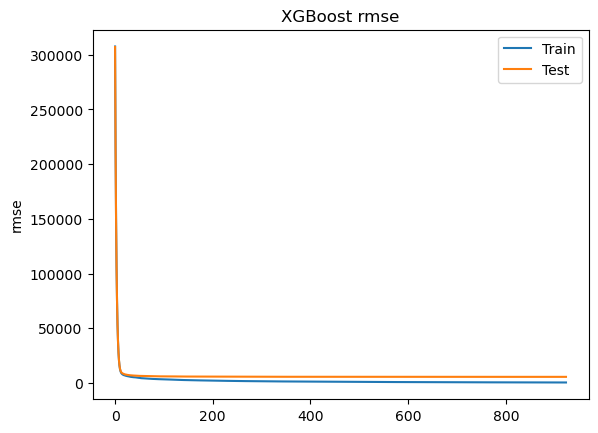

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

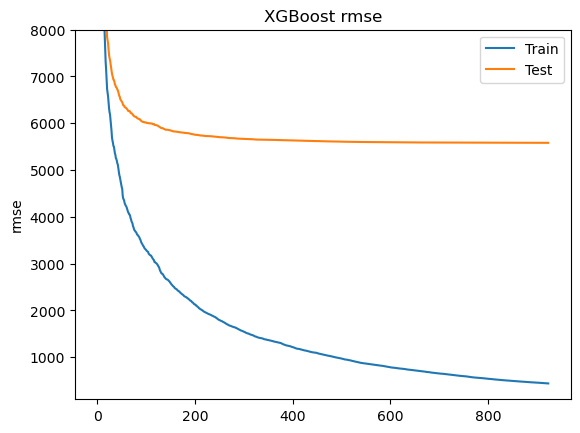

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.ylim([100, 8000])
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost rmse')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

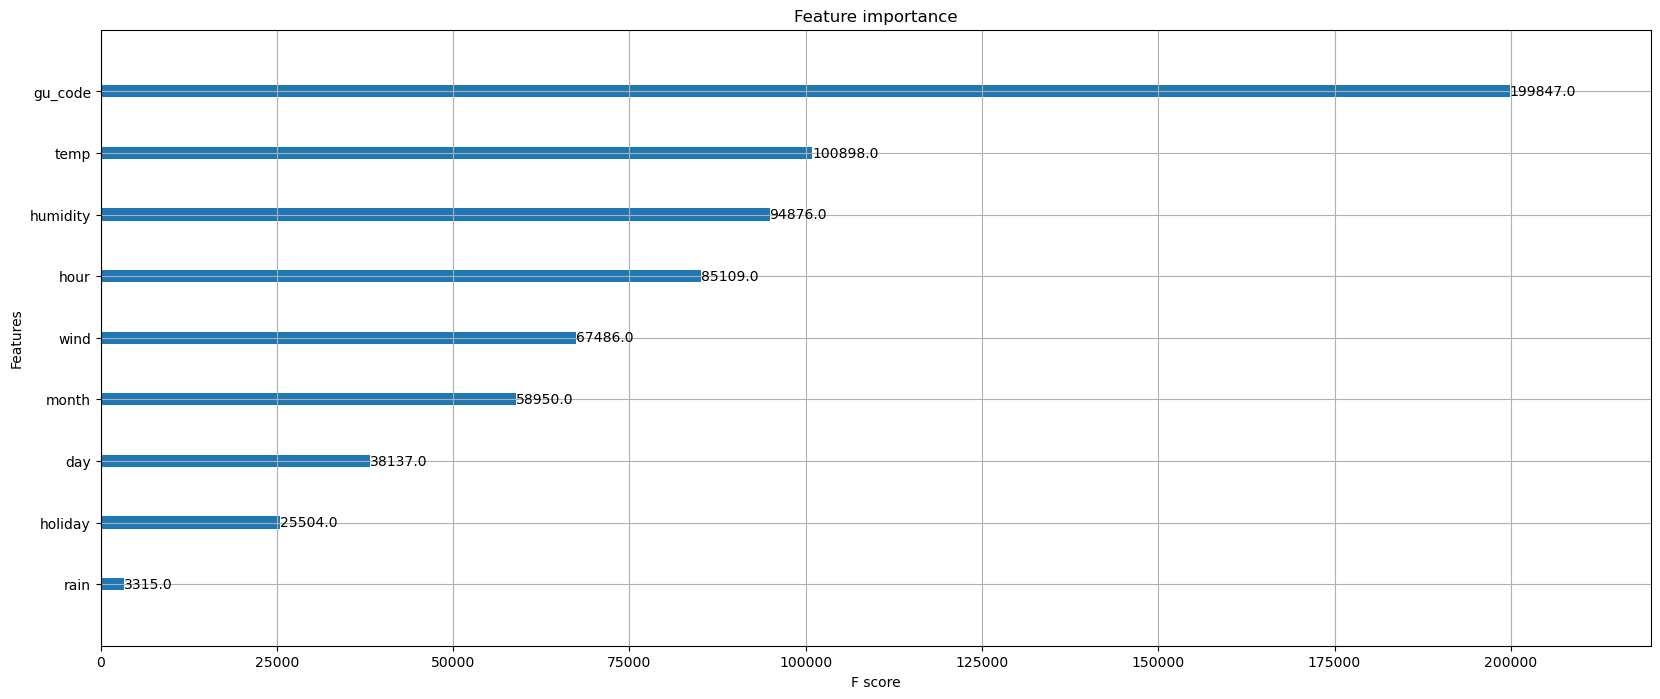

In [28]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(20, 8))
plot_importance(xgb_model2, ax=ax)

In [29]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  5581.521201213248


In [30]:
result = result.reset_index().drop(['index'], axis = 1)
result

,datetime,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,people
0,2022-12-09 07:00:00,11290,12,1,4,7,1.8,1.1,0,54.3,432170
1,2022-01-20 14:00:00,11320,1,0,3,14,-0.1,1.0,0,37.3,238740
2,2022-10-25 19:00:00,11560,10,0,1,19,12.2,0.5,0,45.1,474759
3,2022-12-16 05:00:00,11305,12,1,4,5,-9.9,1.2,0,57.5,299077
4,2022-06-26 16:00:00,11590,6,2,6,16,27.6,2.1,0,75.2,368042
...,...,...,...,...,...,...,...,...,...,...,...
65695,2022-12-31 18:00:00,11260,12,2,5,18,1.1,0.9,0,46.8,349088
65696,2022-06-29 04:00:00,11545,6,0,2,4,24.2,4.6,1,92.4,205298
65697,2022-03-06 00:00:00,11305,3,2,6,0,-1.2,1.6,0,35.0,316600
65698,2022-10-16 00:00:00,11530,10,2,6,0,17.5,0.0,0,55.0,380961


In [31]:
df_y_pred = pd.DataFrame(y_pred)
df_y_pred = df_y_pred
df_y_pred = df_y_pred.astype('int64')
df_y_pred.columns = ['pred_people']
df_y_pred

,pred_people
0,431494
1,239451
2,481416
3,301792
4,364999
...,...
65695,342620
65696,204786
65697,316514
65698,381094


In [32]:
result = pd.concat([result, df_y_pred], axis = 1)
result

,datetime,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,people,pred_people
0,2022-12-09 07:00:00,11290,12,1,4,7,1.8,1.1,0,54.3,432170,431494
1,2022-01-20 14:00:00,11320,1,0,3,14,-0.1,1.0,0,37.3,238740,239451
2,2022-10-25 19:00:00,11560,10,0,1,19,12.2,0.5,0,45.1,474759,481416
3,2022-12-16 05:00:00,11305,12,1,4,5,-9.9,1.2,0,57.5,299077,301792
4,2022-06-26 16:00:00,11590,6,2,6,16,27.6,2.1,0,75.2,368042,364999
...,...,...,...,...,...,...,...,...,...,...,...,...
65695,2022-12-31 18:00:00,11260,12,2,5,18,1.1,0.9,0,46.8,349088,342620
65696,2022-06-29 04:00:00,11545,6,0,2,4,24.2,4.6,1,92.4,205298,204786
65697,2022-03-06 00:00:00,11305,3,2,6,0,-1.2,1.6,0,35.0,316600,316514
65698,2022-10-16 00:00:00,11530,10,2,6,0,17.5,0.0,0,55.0,380961,381094


In [33]:
# result.to_csv('./xgb_result.csv', index=True, encoding='utf-8-sig')

In [34]:
result[['datetime', 'people', 'pred_people']]

,datetime,people,pred_people
0,2022-12-09 07:00:00,432170,431494
1,2022-01-20 14:00:00,238740,239451
2,2022-10-25 19:00:00,474759,481416
3,2022-12-16 05:00:00,299077,301792
4,2022-06-26 16:00:00,368042,364999
...,...,...,...
65695,2022-12-31 18:00:00,349088,342620
65696,2022-06-29 04:00:00,205298,204786
65697,2022-03-06 00:00:00,316600,316514
65698,2022-10-16 00:00:00,380961,381094


In [35]:
result['차이(%)'] = abs(result['people'] - result['pred_people'])/result['people']
result

,datetime,gu_code,month,holiday,day,hour,temp,wind,rain,humidity,people,pred_people,차이(%)
0,2022-12-09 07:00:00,11290,12,1,4,7,1.8,1.1,0,54.3,432170,431494,0.001564
1,2022-01-20 14:00:00,11320,1,0,3,14,-0.1,1.0,0,37.3,238740,239451,0.002978
2,2022-10-25 19:00:00,11560,10,0,1,19,12.2,0.5,0,45.1,474759,481416,0.014022
3,2022-12-16 05:00:00,11305,12,1,4,5,-9.9,1.2,0,57.5,299077,301792,0.009078
4,2022-06-26 16:00:00,11590,6,2,6,16,27.6,2.1,0,75.2,368042,364999,0.008268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65695,2022-12-31 18:00:00,11260,12,2,5,18,1.1,0.9,0,46.8,349088,342620,0.018528
65696,2022-06-29 04:00:00,11545,6,0,2,4,24.2,4.6,1,92.4,205298,204786,0.002494
65697,2022-03-06 00:00:00,11305,3,2,6,0,-1.2,1.6,0,35.0,316600,316514,0.000272
65698,2022-10-16 00:00:00,11530,10,2,6,0,17.5,0.0,0,55.0,380961,381094,0.000349


In [36]:
result['차이(%)'].mean()

0.0066564226954866175

# 모델 저장

In [37]:
xgb_model2.save_model("xgb_model.model")